# Decision Tree

## [ Decision Tree 개념]

### 1. Decision Tree 요소

* 뿌리마디 : 나무 구조가 시작되는 마디
* 중간마디 : 나무 구조의 중간에 있는 마디
* 끝마디 : 나무 구조의 끝에 위치하는 마디, 끝 마디에서 더이상 노드가 생성되지 않음
* 깊이 : 뿌리 노드에서 끝마디까지의 노드 개수

### 2. Decision Tree에 사용되는 알고리즘

#### 2-1. CART

* CART : Classification And Regresssion Tree
  * 목적 : 각 분할에서 정보 이득을 최대화 하는 것
  * 정보이득의 최대화 -> 불순도의 감소

#### 2-2. 범주형/연속형 데이터의 불확실성 지수

* 정보 이득  
  * 정답이 범주형인 경우 : 엔트로피 지수(정보의 불확실함 정도), 지니 지수
  * 정답이 연속형인 경우 : MSE를 이용한 분산량 감소

* 엔트로피 지수
  * $entropy(A)=\sum_{i=1}^{d}R_i(-\sum_{k=1}^{m}p_k * log_2 (p_k))$
  * $p_k$ : k에 속할 확률(그룹 내에서 해당 집단에 속할 확률)
  * $R_i$ : 분할 후 비율(해당 집단에 속할 확률 = 해당 그룹 원소 개수/전체 원소 개수)
* 지니 지수
  * 데이터가 비슷하게 있을 수록 지니 지수가 높음
  * $\sum_{i=1}^{d}R_i(1-\sum_{k=1}^{m}(p_k)^2)$

* 노드를 나누는 방법
  * 범주형 변수 : 데이터의 특성의 유무로 분할(삼각형의 특성을 가졌는가?) => 정보 이득을 최대로 하는 분할로 노드 분할
  * 연속형 변수 : 특성의 유무로 나눌 수 없어 경계값을 찾고 경계값과의 비교를 통해 데이터 분할 => 데이터를 정렬해 정답이 변화(0->1,1->0)하는 구간에서 평균을 경계값으로 설정하여 불순도가 가장 낮은 구간을 경계로 설정
    * 아래 예시에서 두 구간에서 평균을 경계값으로 하여 더 작은 값인 345를 경계값으로 설정하게 됨

<img src="../Images/Machine_Learning/Decision_Tree_1.JPG" width="400" height="200" title=""/>

#### 2-3. 변수 중요도

* Feature Importance : 변수 중요도
  * 의사결정나무에서 어떤 변수가 가장 중요한지 판단
  * 불순도를 가장 크게 감소시키는 변수의 중요도가 가장 큼

* 아래 예시
  * $I(C)=0.5-\frac{100}{200} *0.25-\frac{100}{200} *0.25=0.25$

<img src="../Images/Machine_Learning/Decision_Tree_2.JPG" width="400" height="200" title=""/>
<img src="../Images/Machine_Learning/Decision_Tree_3.JPG" width="400" height="200" title=""/>

#### 2-4. 가지치기

* 가지치기 : 분기가 너무 많아지는 것을 막기 위해 적절한 수준에서 끝 노드를 결합해주는 것
  * 사전 가지치기 : Pre-Pruning, 의사결정나무의 최대 Depth나 노드의 최소 개수를 미리 지정해 더 이상의 분할이 일어나지 않게 하는 방법
  * 사후 가지치기 : Post-Pruning, 의사결정나무를 만든 후 데이터가 적은 노드를 삭제하거나 병합

### 3. 의사결정나무의 장단점

* 장점
  * 모델의 예측 결과를 해석하고 이해하기 쉬움
  * 데이터를 가공할 필요가 거의 없음
* 단점 
  * 연속형 변수를 범주형 값으로 취급하기 때문에 분리 경계점 부근에서의 예측 오류가 클 수 있음
  * 노이즈 데이터에 영향을 크게 받음
  * Overfitting의 문제가 발생하기 쉬움

---

## [ Decision Tree Classification]

### 1. Data Load

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [195]:
data = {
    "value": [30, 120, 150, 390, 400, 300, 500],
    "label": [0, 0, 1, 0, 0, 1, 0]
}
data = pd.DataFrame(data)
data

,value,label
0,30,0
1,120,0
2,150,1
3,390,0
4,400,0
5,300,1
6,500,0


In [196]:
sorted_data = data.sort_values(by="value")
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
5,300,1
3,390,0
4,400,0
6,500,0


In [197]:
sorted_data = sorted_data.reset_index(drop=True) # 기존 index 삭제
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
3,300,1
4,390,0
5,400,0
6,500,0


### 2. 경계지점

* diff() : 이전 데이터와 현재 데이터의 동일 여부

In [198]:
boundary = sorted_data["label"].diff()
boundary

0    NaN
1    0.0
2    1.0
3    0.0
4   -1.0
5    0.0
6    0.0
Name: label, dtype: float64

In [199]:
boundary = sorted_data["label"].diff() != 0
boundary[0]=False
boundary

0    False
1    False
2     True
3    False
4     True
5    False
6    False
Name: label, dtype: bool

In [200]:
boundary.loc[boundary]

2    True
4    True
Name: label, dtype: bool

* 값이 변화하는 지점의 인덱스 추출

In [201]:
boundary_idx = boundary.loc[boundary].index
boundary_idx

Int64Index([2, 4], dtype='int64')

* 경계의 평균값을 기준으로 

In [202]:
data

,value,label
0,30,0
1,120,0
2,150,1
3,390,0
4,400,0
5,300,1
6,500,0


In [203]:
idx_1 = boundary_idx[0]
data.loc[[idx_1-1, idx_1]]

,value,label
1,120,0
2,150,1


In [204]:
bound_value_1 = sorted_data.loc[[idx_1-1, idx_1]]["value"].mean()
# bound_value_1 = data.loc[[idx_1-1, idx_1], "value"].mean()
bound_value_1

135.0

* **오류** 인것 같음 => sorted_data로 loc 수행해야 ㅎ함

In [205]:
idx_2 = boundary_idx[1]
bound_value_2 = sorted_data.loc[[idx_2-1, idx_2], "value"].mean()
bound_value_2

345.0

In [206]:
data.loc[[idx_2-1, idx_2]]

,value,label
3,390,0
4,400,0


### 3. 지니 지수

In [207]:
def gini_index(label):
    p1 = (label == 0).mean() # 0일 확률
    p2 = 1 - p1 # 1일 확률
    return 1 - (p1 ** 2 + p2 **2)

def concat_gini_index(left, right):
    left_gini = gini_index(left)
    right_gini = gini_index(right)
    all_num = len(left) + len(right)
    left_gini *= len(left) / all_num
    right_gini *= len(right) / all_num
    return left_gini + right_gini

* 135 경계값

In [208]:
left_1 = sorted_data.loc[:idx_1 - 1, "label"]
right_1 = sorted_data.loc[idx_1:, "label"]

In [209]:
left_1, right_1

(0    0
 1    0
 Name: label, dtype: int64,
 2    1
 3    1
 4    0
 5    0
 6    0
 Name: label, dtype: int64)

In [210]:
gini_index(left_1), gini_index(right_1)

(0.0, 0.48)

In [211]:
concat_gini_index(left_1, right_1)

0.34285714285714286

* 345 경계값

In [212]:
left_2 = sorted_data.loc[:idx_2 - 1, "label"]
right_2 = sorted_data.loc[idx_2:, "label"]

concat_gini_index(left_2, right_2)

0.2857142857142857

### 4. 의사결정나무 모델

In [213]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=1)

tree.fit(data["value"].to_frame(), data["label"]) # model.fit(DataFrame, Series)

DecisionTreeClassifier(max_depth=1)

* plot_tree : 경계값에 따른 트리 시각화

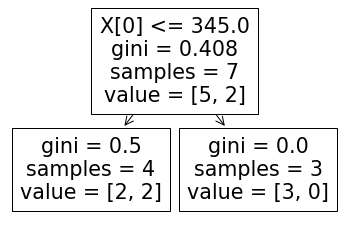

In [214]:
plot_tree(tree);

## [ Decision Tree Regressor ]

### 1. Data load

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [216]:
# np.random.normal : 균등분포(low~high, size크기로)
data = np.sort(np.random.uniform(low=0, high=5, size=(80, 1)))
# ravel() : 다차원을 1차원으로 풀기
label = np.sin(data).ravel()
label[::5] += 3 * (0.5 - np.random.uniform(0, 1, 16))

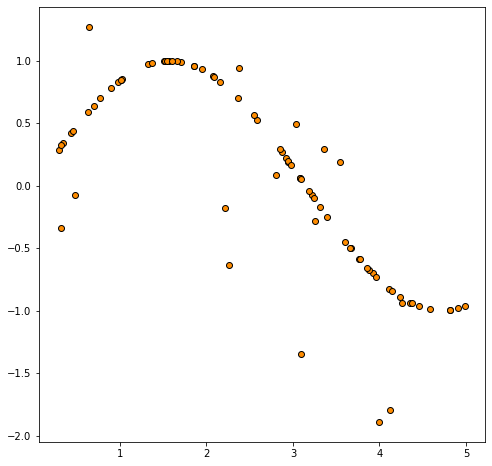

In [217]:
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")

In [218]:
viz_test_data = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
viz_test_data[:5]

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04]])

In [219]:
viz_test_data.shape

(500, 1)

### 2. Decision Tree Regressor

#### 2-1. 분할이 없는 경우

In [220]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [221]:
viz_test_pred = np.repeat(label.mean(), len(viz_test_data))

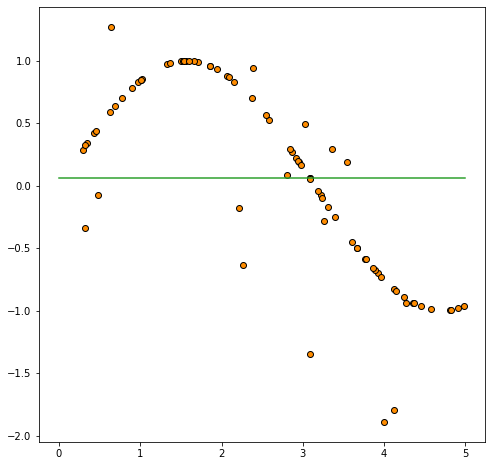

In [222]:
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, viz_test_pred, color="C2")

* 분할이 없는 경우의 Var

In [223]:
train_pred = np.repeat(label.mean(), len(data))
mse_var = np.var(label - train_pred)

print("no divide mse variance: %.4f" %(mse_var))

no divide mse variance: 0.5804


### 2-2. 첫 번째 분할

In [224]:
first_divide = DecisionTreeRegressor(max_depth=1)

first_divide.fit(data, label)

first_divide_pred = first_divide.predict(viz_test_data)

* 어떤 값으로 데이터를 나누는가

In [225]:
first_divide.tree_.threshold

array([ 3.08797491, -2.        , -2.        ])

* 첫번째 분할에 의한 영역 나누기

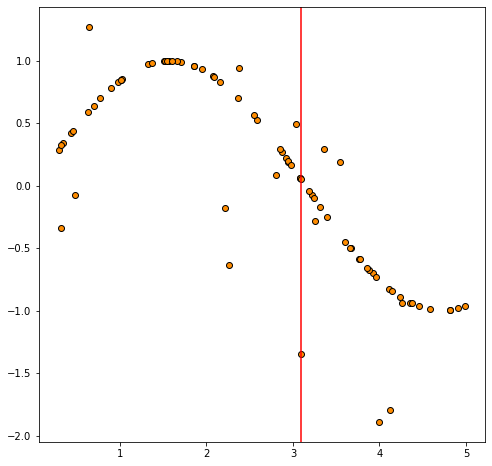

In [226]:
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.axvline(first_divide.tree_.threshold[0], color="red")

* 각 영역의 평균

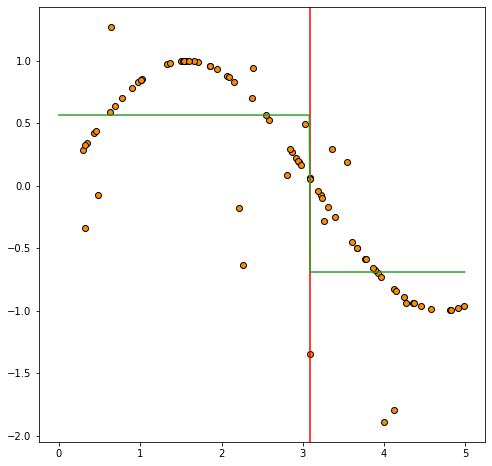

In [227]:
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.axvline(first_divide.tree_.threshold[0], color="red")
plt.plot(viz_test_data, first_divide_pred, color="C2")

[Text(0.5, 0.75, 'X[0] <= 3.088\nsquared_error = 0.58\nsamples = 80\nvalue = 0.062'),
 Text(0.25, 0.25, 'squared_error = 0.179\nsamples = 48\nvalue = 0.565'),
 Text(0.75, 0.25, 'squared_error = 0.236\nsamples = 32\nvalue = -0.691')]

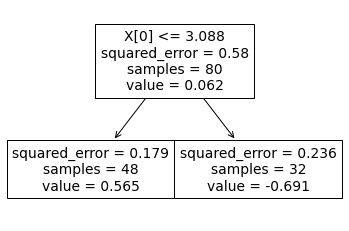

In [228]:
plot_tree(first_divide)

### 2-3. 두 번째 분할

In [229]:
second_divide = DecisionTreeRegressor(max_depth=2)

second_divide.fit(data, label)

second_divide_pred = second_divide.predict(viz_test_data)

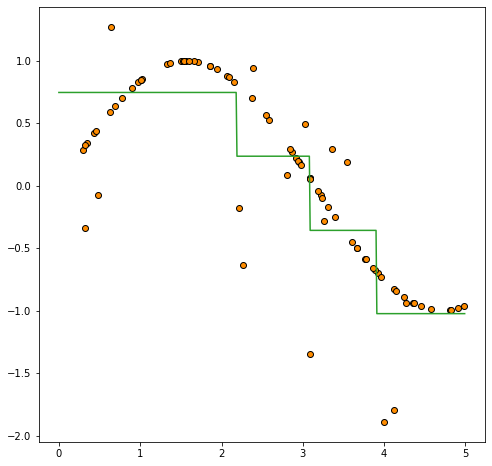

In [230]:
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, second_divide_pred, color="C2")

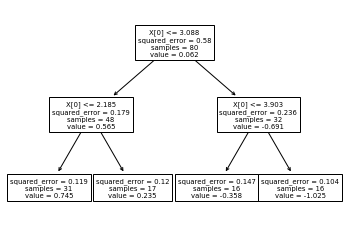

In [231]:
plot_tree(second_divide);

### 2-4. Depth에 따른 변화

In [232]:
shallow_depth_tree = DecisionTreeRegressor(max_depth=2)
deep_depth_tree = DecisionTreeRegressor(max_depth=5)

shallow_depth_tree.fit(data, label)
deep_depth_tree.fit(data, label)

shallow_pred = shallow_depth_tree.predict(viz_test_data)
deep_pred = deep_depth_tree.predict(viz_test_data)

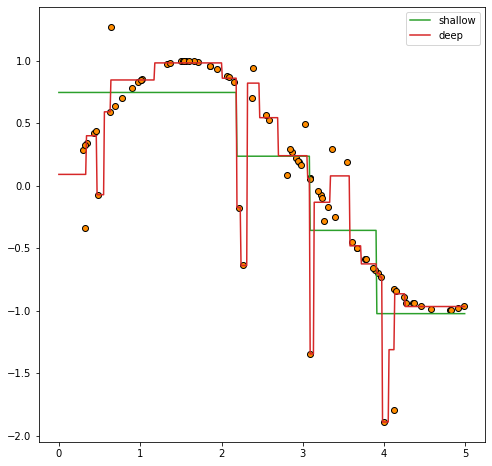

In [233]:
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, shallow_pred, color="C2", label="shallow")
plt.plot(viz_test_data, deep_pred, color="C3", label="deep")
plt.legend()

---

## [ Decision Tree : IRIS 꽃 분류하기 ]

### 1. Data Load

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [235]:
from sklearn.datasets import load_iris

iris = load_iris()

data, target = iris["data"], iris["target"]

pd.DataFrame(data, columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [236]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, train_size=0.7, random_state=2021, stratify=target)

print("train data 개수:", len(train_data))
print("train data 개수:", len(test_data))

train data 개수: 105
train data 개수: 45


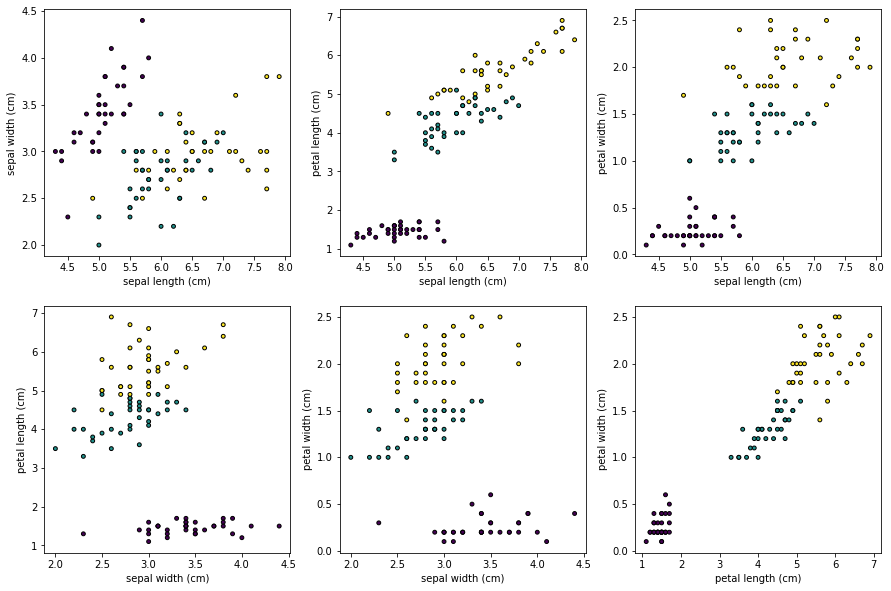

In [237]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

pair_combs = [
    [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
]
for idx, pair in enumerate(pair_combs):
    x, y = pair
    ax = axes[idx//3, idx%3]
    ax.scatter(
        x=train_data[:, x], y=train_data[:, y], c=train_target, edgecolor='black', s=15
    )
    ax.set_xlabel(iris["feature_names"][x])
    ax.set_ylabel(iris["feature_names"][y])

### 2. Decision Tree

#### 2-1. 학습

In [238]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

gini_tree = DecisionTreeClassifier()

gini_tree.fit(train_data, train_target)

DecisionTreeClassifier()

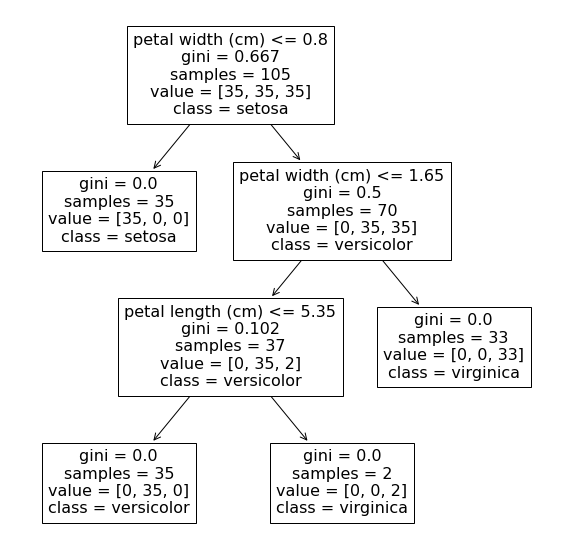

In [239]:
plt.figure(figsize=(10,10))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names=iris["target_names"]);

#### 2-2. 파라미터 변경

* 탐색할 파라미터 => criterion, criterion, min_samples_split
  * criterion
    - 어떤 정보 이득을 기준으로 데이터를 나눌 것인가
    - "gini", "entropy"
  * max_depth
    - 나무의 최대 깊이 설정
  * min_samples_split
    - 노드가 나눠질 수 있는 최소 데이터 개수 설정

* Criterion

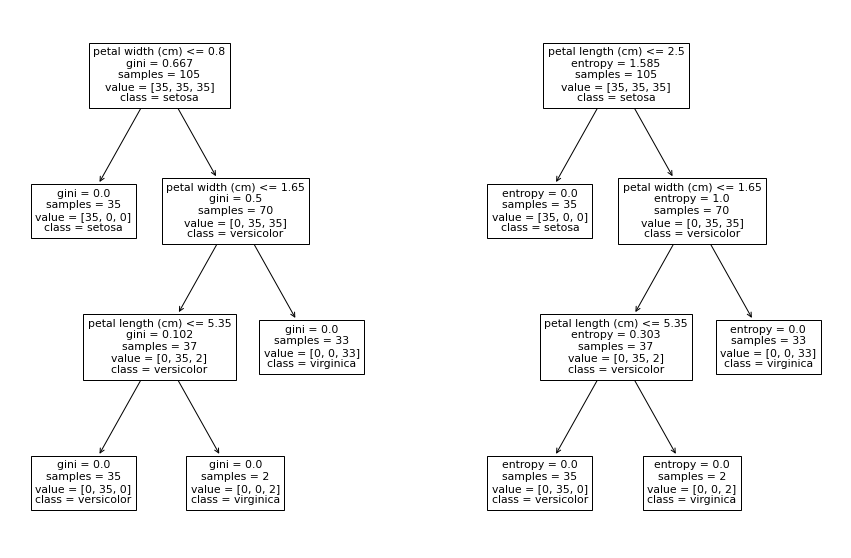

In [240]:
entropy_tree = DecisionTreeClassifier(criterion="entropy")
entropy_tree.fit(train_data, train_target)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=axes[0])
plot_tree(entropy_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=axes[1])
plt.show()

* max_depth

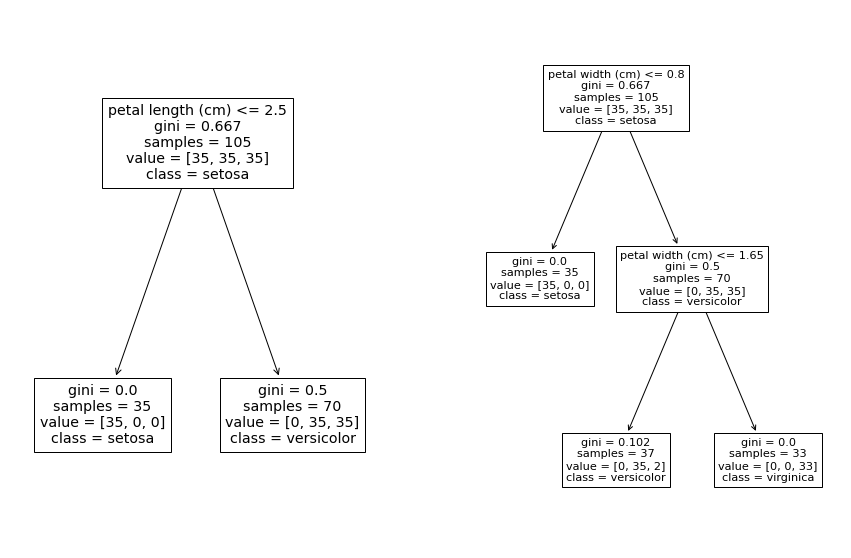

In [241]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
for i in range(1, 3):
    depth_1_tree = DecisionTreeClassifier(max_depth=i)
    depth_1_tree.fit(train_data, train_target)

    plot_tree(depth_1_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=ax[i-1])

* min_samples_split

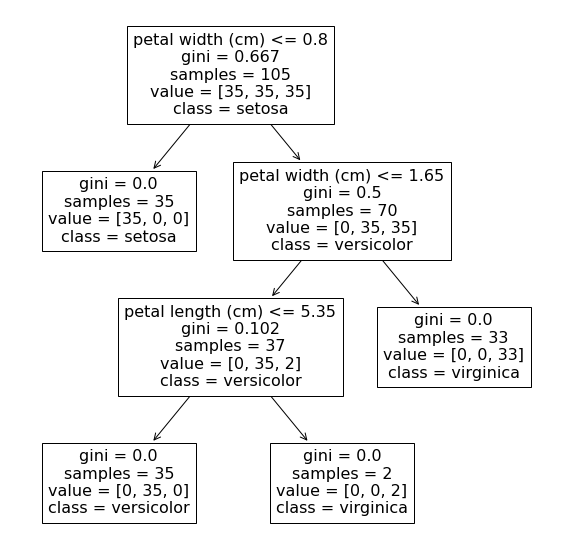

In [242]:
plt.figure(figsize=(10,10))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names=iris["target_names"]); # min_samples_split default 값은 2

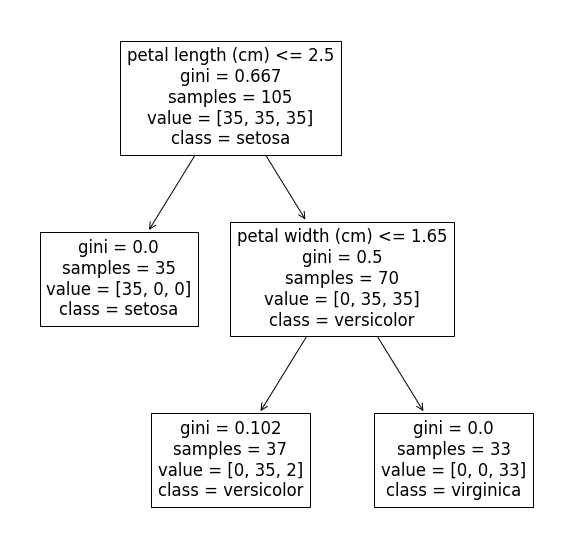

In [243]:
sample_50_tree = DecisionTreeClassifier(min_samples_split=50)
sample_50_tree.fit(train_data, train_target)
plt.figure(figsize=(10,10))
plot_tree(sample_50_tree, feature_names=iris["feature_names"], class_names=iris["target_names"]);

### 2-3. 예측

In [244]:
trees = [
    ("gini tree", gini_tree),
    ("entropy tree", entropy_tree),
    ("depth=1 tree", depth_1_tree),
    ("sample=50 tree" ,sample_50_tree),
]

train_preds = []
test_preds = []
for tree_name, tree in trees:
    train_pred = tree.predict(train_data)
    test_pred =  tree.predict(test_data)
    train_preds += [train_pred]
    test_preds += [test_pred]

In [245]:
train_preds

[array([0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1,
        2, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0,
        2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0,
        0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2,
        1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1]),
 array([0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1,
        2, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0,
        2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0,
        0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2,
        1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1]),
 array([0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1,
        2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0,
        2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0,
        0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2,

### 2-4. 평가

In [246]:
from sklearn.metrics import accuracy_score

for idx, (tree_name, tree) in enumerate(trees):
    train_acc = accuracy_score(train_target, train_preds[idx])
    test_acc =  accuracy_score(test_target, test_preds[idx])
    print(tree_name)
    print("\t", f"train accuracy is {train_acc:.2f}")
    print("\t", f"test accuracy is {test_acc:.2f}")

gini tree
	 train accuracy is 1.00
	 test accuracy is 0.91
entropy tree
	 train accuracy is 1.00
	 test accuracy is 0.91
depth=1 tree
	 train accuracy is 0.98
	 test accuracy is 0.91
sample=50 tree
	 train accuracy is 0.98
	 test accuracy is 0.91


### 2-5. Feature Importance

* model.feature_importance_ 사용

In [247]:
gini_tree.feature_importances_

array([0.        , 0.        , 0.05405405, 0.94594595])

In [248]:
gini_feature_importance = pd.Series(gini_tree.feature_importances_, index=iris["feature_names"])
gini_feature_importance

sepal length (cm)    0.000000
sepal width (cm)     0.000000
petal length (cm)    0.054054
petal width (cm)     0.945946
dtype: float64

<AxesSubplot:title={'center':'gini tree feature importance'}>

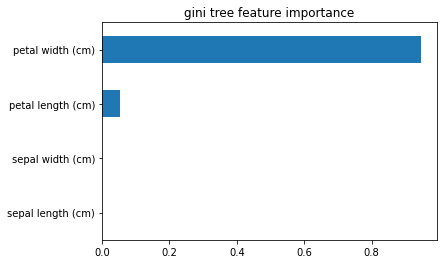

In [249]:
gini_feature_importance.plot(kind="barh", title="gini tree feature importance")

<AxesSubplot:title={'center':'sample=50 tree feature importance'}>

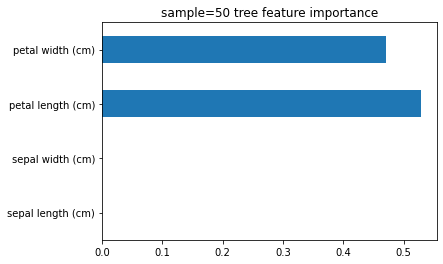

In [250]:
sample_50_feature_importance = pd.Series(sample_50_tree.feature_importances_, index=iris["feature_names"])
sample_50_feature_importance.plot(kind="barh", title="sample=50 tree feature importance")

### 2-5. 시각화

In [251]:
def plot_decision_boundary(pair_data, pair_tree, ax):
    x_min, x_max = pair_data[:, 0].min() - 1, pair_data[:, 0].max() + 1
    y_min, y_max = pair_data[:, 1].min() - 1, pair_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = pair_tree.predict(np.c_[xx.ravel(), yy.ravel()]) # np.c_ : 배열을 세로로 붙이기
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # Plot the training points
    for i, color in zip(range(3), "ryb"):
        idx = np.where(train_target == i)
        ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    return ax

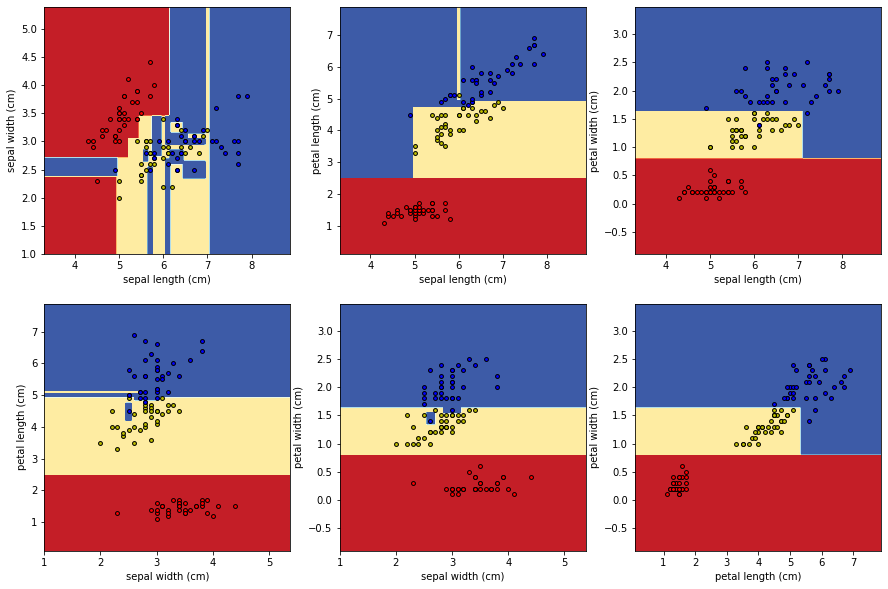

In [252]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

pair_combs = [
    [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
]
for idx, pair in enumerate(pair_combs):
    x, y = pair
    pair_data = train_data[:, pair]
    pair_tree = DecisionTreeClassifier().fit(pair_data, train_target)

    ax = axes[idx//3, idx%3]
    ax = plot_decision_boundary(pair_data, pair_tree, ax)
    ax.set_xlabel(iris["feature_names"][x])
    ax.set_ylabel(iris["feature_names"][y])